In [109]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [4]:
path = 'player_style/'
name = []
data = []

for file_name in os.listdir(path):
    if file_name == '.DS_Store':
        continue
        
    f = open(path + file_name, encoding = 'utf-8')
    a = []
    content = f.readlines()
    for line in content:
        a.append(line.replace("\n", ""))
        f.close()
    name.append(file_name)
    data.append(''.join(a))
    

In [5]:
data[1]

'Wozniacki was a defensive baseliner, known for her counterpunching style of play; upon her retirement in 2020, she was described by The Guardian as "one of the most defensive players to ever reach No. 1". As her game was centered around the retrieval of balls with devastating consistency, her greatest assets on court were her movement, speed, court coverage, aggressive footwork, anticipation, balance, and stamina.[149] Due to the fact that her game was based almost solely on defense, she was referred to as a pusher by critics, and was criticised for her reactive playing style, and lack of major weapons.[150] Wozniacki responded to criticism of her defensive playing style by saying: "If I don\'t have a weapon, then what do the others have? Since I\'m No. 1, I must do something right."[151]Wozniacki\'s greatest weapon was her two-handed backhand, which she used to turn defence into offence. Her backhand was hit flat, and was noted for its consistent depth, pace, and penetration; she was

In [67]:
name_preocessed = []
for item in name:
    item = item.lower()   
    name_preocessed.extend(item.replace('.txt', '').split(' '))

In [68]:
punctuations = string.punctuation + '·“—'

table = str.maketrans('', '', punctuations + string.digits)   ###   mapping punctuation、digit and whitespace
stop_words = set(stopwords.words('english'))     ###  loading stopwords
stop_words.add('etc')
stop_words.update(name_preocessed)

In [69]:
def segmentation(cropus):
    data = []
    lem = WordNetLemmatizer()
    stem = PorterStemmer()
        
    for item in cropus:
        
        sentence = item.lower()    ###   replace the upper case in words with lower case
        sentence = sentence.translate(table)    ###   removing punctuations、digits
        sentence = sentence.split()   
        content = []
        
        for word in sentence:       ###  removing stopwords
            if word not in stop_words:
                content.append(word)
                
        content = [stem.stem(word) for word in content]    ###  提取词干
        data.append(content)
    
    return data

In [70]:
data_processed = segmentation(data)

In [71]:
data_processed[1]

['defens',
 'baselin',
 'known',
 'counterpunch',
 'style',
 'play',
 'upon',
 'retir',
 'describ',
 'guardian',
 'one',
 'defens',
 'player',
 'ever',
 'reach',
 'game',
 'center',
 'around',
 'retriev',
 'ball',
 'devast',
 'consist',
 'greatest',
 'asset',
 'court',
 'movement',
 'speed',
 'court',
 'coverag',
 'aggress',
 'footwork',
 'anticip',
 'balanc',
 'stamina',
 'due',
 'fact',
 'game',
 'base',
 'almost',
 'sole',
 'defens',
 'refer',
 'pusher',
 'critic',
 'criticis',
 'reactiv',
 'play',
 'style',
 'lack',
 'major',
 'weapon',
 'respond',
 'critic',
 'defens',
 'play',
 'style',
 'say',
 'dont',
 'weapon',
 'other',
 'sinc',
 'im',
 'must',
 'someth',
 'rightwozniacki',
 'greatest',
 'weapon',
 'twohand',
 'backhand',
 'use',
 'turn',
 'defenc',
 'offenc',
 'backhand',
 'hit',
 'flat',
 'note',
 'consist',
 'depth',
 'pace',
 'penetr',
 'known',
 'backhand',
 'downthelin',
 'throughout',
 'career',
 'wozniacki',
 'weakest',
 'shot',
 'forehand',
 'note',
 'lack',
 'depth'

# 

In [72]:
def get_vocabulary(cropus):
    
    vocabulary = []
    for item in cropus:
        vocabulary = set(vocabulary).union(set(item))
        
    return vocabulary

In [73]:
vocabulary = get_vocabulary(data_processed)

# 

In [104]:
NumOfWords = dict.fromkeys(vocabulary, 0)
for text in data_processed:
    for word in text:
        NumOfWords[word] += 1
        
WordsFreq = pd.DataFrame.from_dict(NumOfWords, orient = 'index',columns=['Freq'])
WordsFreq = WordsFreq.reset_index().rename(columns = {'index':'Word'})
WordsFreq.sort_values(by = 'Freq', ascending = False, inplace = True)
WordsFreq

,Word,Freq
932,serv,307
317,hit,247
249,play,206
287,backhand,174
933,shot,170
809,court,165
102,forehand,165
609,power,161
1965,game,145
1279,player,145


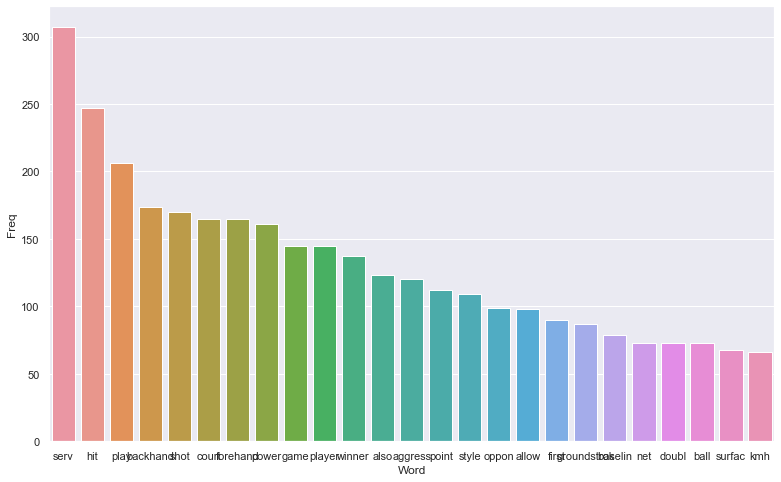

In [113]:
sns.barplot(x = "Word", y = "Freq", data = WordsFreq.iloc[:25, :25])
plt.show()

# 

In [74]:
def calculate_TF(cropus, ID):
    
    numOfWords = dict.fromkeys(cropus[ID], 0)
    for word in cropus[ID]:
        numOfWords[word] += 1
    
    TFdict = {}
    for word, count in numOfWords.items():
        TFdict[word] = count / float(len(cropus[ID]))
    
    return TFdict

In [75]:
print(calculate_TF(data_processed, 1))

{'defens': 0.022988505747126436, 'baselin': 0.007662835249042145, 'known': 0.01532567049808429, 'counterpunch': 0.0038314176245210726, 'style': 0.011494252873563218, 'play': 0.019157088122605363, 'upon': 0.0038314176245210726, 'retir': 0.0038314176245210726, 'describ': 0.0038314176245210726, 'guardian': 0.007662835249042145, 'one': 0.0038314176245210726, 'player': 0.0038314176245210726, 'ever': 0.0038314176245210726, 'reach': 0.0038314176245210726, 'game': 0.011494252873563218, 'center': 0.0038314176245210726, 'around': 0.0038314176245210726, 'retriev': 0.007662835249042145, 'ball': 0.007662835249042145, 'devast': 0.0038314176245210726, 'consist': 0.007662835249042145, 'greatest': 0.011494252873563218, 'asset': 0.0038314176245210726, 'court': 0.02681992337164751, 'movement': 0.007662835249042145, 'speed': 0.007662835249042145, 'coverag': 0.0038314176245210726, 'aggress': 0.011494252873563218, 'footwork': 0.0038314176245210726, 'anticip': 0.0038314176245210726, 'balanc': 0.0038314176245

In [76]:
def calculate_IDF(cropus, vocabulary):
    
    IDFdict = dict.fromkeys(vocabulary, 0)
    
    N = len(cropus)
    
    for word, val in IDFdict.items():
        for content in cropus:
            if word in content:
                IDFdict[word] += 1
    
    for word, val in IDFdict.items():
        IDFdict[word] = math.log(N / float(val + 1))
        
    return IDFdict

In [77]:
IDFs = calculate_IDF(data_processed, vocabulary)

In [78]:
IDFs

{'modern': 3.068052935133617,
 'usher': 3.7612001156935624,
 'physic': 3.068052935133617,
 'serveon': 3.7612001156935624,
 'outgun': 3.7612001156935624,
 'madrid': 3.355735007585398,
 'one': 0.8708283577973978,
 'comment': 1.9694406464655074,
 'scholar': 3.068052935133617,
 'impress': 2.662587827025453,
 'partner': 3.068052935133617,
 'nick': 2.8449093838194073,
 'confid': 2.5084371471981943,
 'topspin': 1.2762934659055623,
 'common': 3.355735007585398,
 'grasp': 3.7612001156935624,
 'predic': 3.7612001156935624,
 'wertheim': 3.7612001156935624,
 'anyon': 3.7612001156935624,
 'analyst': 3.355735007585398,
 'pace': 1.2762934659055623,
 'road': 3.355735007585398,
 'femal': 3.068052935133617,
 'twohand': 1.122142786078304,
 'clock': 3.068052935133617,
 'go': 2.151762203259462,
 'unlik': 3.355735007585398,
 'offenc': 2.662587827025453,
 'slovak': 3.7612001156935624,
 'point': 0.5031035776720804,
 'fare': 3.7612001156935624,
 'unsourc': 3.068052935133617,
 'serveandvolley': 2.84490938381940

# 

In [79]:
def get_TFIDFs(cropus, vocabulary):
    
    values = np.zeros((len(cropus),len(vocabulary)),dtype = np.int64)
    TFIDF_Matrix = pd.DataFrame(data = values, columns = vocabulary)
    TFIDF_Matrix.index = range(0, len(cropus))
    
    for ID in range(0, len(cropus)):
        tfs = calculate_TF(cropus, ID)
        for word in cropus[ID]:
            if word in vocabulary:
                TFIDF_Matrix.loc[ID, word] = tfs[word] * IDFs[word] 
    
    return  TFIDF_Matrix

In [80]:
TFIDF_Matrix = get_TFIDFs(data_processed, vocabulary)

In [81]:
TFIDF_Matrix

,modern,usher,physic,serveon,outgun,madrid,one,comment,scholar,impress,...,heavyweight,credit,repeatedli,tennish,hear,presurgeri,span,seemingli,advantag,ice
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.014541,0.012619,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.014411,0.0,0.0,0.0,0.0,0.003337,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,0.011578,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.008753,0.000000,0.000000,...,0.0,0.011149,0.0,0.0,0.016716,0.000000,0.0,0.0,0.000000,0.000000
82,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
83,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.015653,0.000000
84,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [82]:
index_row = TFIDF_Matrix.index
index_colums = TFIDF_Matrix.columns
df_T = pd.DataFrame(TFIDF_Matrix.values.T,columns = index_row,index = index_colums)
df_T

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
modern,0.0,0.000000,0.011578,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
usher,0.0,0.014411,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
physic,0.0,0.000000,0.000000,0.0,0.0,0.0,0.011363,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
serveon,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.031875,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
outgun,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
presurgeri,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.007537
span,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
seemingli,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
advantag,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.015653,0.0,0.000000


In [83]:
df_T.iloc[:, 1].sort_values(ascending = False)[:10].index.tolist()

['moonbal',
 'guardian',
 'throughout',
 'retriev',
 'critic',
 'defens',
 'greatest',
 'note',
 'would',
 'career']

# 记录每个球员summary中tf-idf值最大的的前10个词，然后统计这些词的频率，选出最大的10个词

In [84]:
allwords = []
for i in range(len(data_processed)):
    allwords.append(df_T.iloc[:, i].sort_values(ascending = False)[:10].index.tolist())

In [86]:
allwords_unc = []
for item in allwords:
    allwords_unc = set(allwords_unc).union(set(item))

In [87]:
keywords = dict.fromkeys(allwords_unc, 0)
for i in allwords:
    for j in i:
        keywords[j] += 1

In [90]:
pd.set_option('display.max_rows', None)
keys = pd.DataFrame(pd.Series(keywords))
keys.sort_values(by = 0, ascending = False)

,0
strong,6
note,5
em,5
allow,5
remov,4
accur,4
averag,4
possess,4
effect,4
said,3
